In [11]:
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_training, execute_ai_model
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging
import keras
logging.basicConfig(format='%(message)s', level=logging.INFO)

In [12]:
create_experiment_snapshots([25, 50, 75, 100])

In [13]:
# Learning Parameters
epsilon = 1.0  # exploration rate

# Simulator Settings
start_time = 0
finish_time = 3000
mtd_interval = 100
scheme = 'mtd_ai'
total_nodes = 300
new_network = True

In [14]:
evaluation = execute_ai_model(start_time=start_time, finish_time=finish_time, mtd_interval=mtd_interval, scheme=scheme, total_nodes=total_nodes, new_network=new_network)

Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Static period: 0
Action: 1
MTD: CompleteTopologyShuffle triggered 0.0s
Static period: 100.03668327018339
Action: 3
MTD: CompleteTopologyShuffle triggered 100.0s
MTD: Interrupted EXPLOIT_VULN at 120.3s!
Static period: 79.97935549840565
Action: 1
MTD: CompleteTopologyShuffle triggered 200.3s
Static period: 100.49037624652223
Action: 1
MTD: CompleteTopologyShuffle triggered 300.7s
MTD: Interrupted EXPLOIT_VULN at 320.5s!
Static period: 81.86853536825595
Action: 1
MTD: CompleteTopologyShuffle triggered 402.4s
Static period: 100.05787007865518
Action: 2
MTD: CompleteTopologyShuffle triggered 502.4s
MTD: Interrupted EXPLOIT_VULN at 523.0s!
Static period: 79.71270400179526
Action: 1
MTD: CompleteTopologyShuffle triggered 602.7s
Static period: 100.80487008526734
Action: 3
MTD: CompleteTopologyShuffle triggered 703.5s
MTD: Interrupted EXPLOIT_VUL

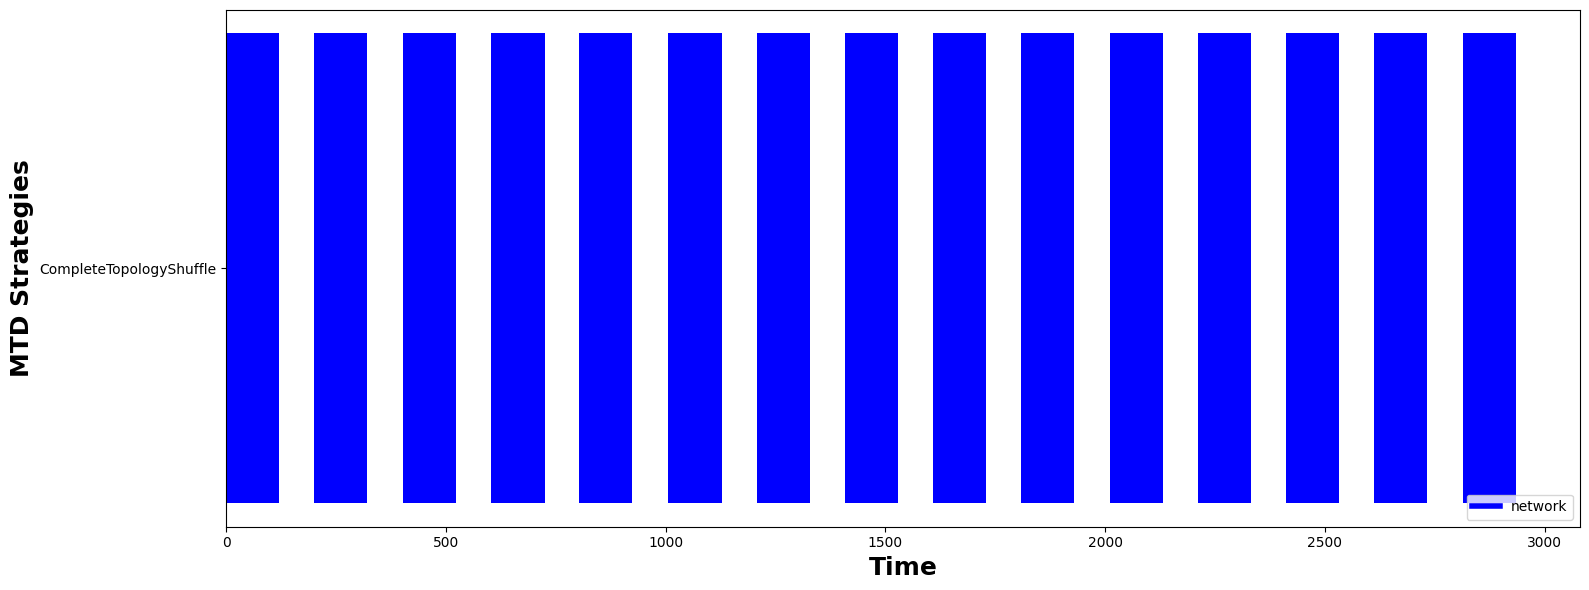

In [15]:
evaluation.visualise_mtd_operation()

In [16]:
evaluation._security_metric_record

,host_compromise_ratio,exposed_endpoints,attack_path_exposure_score,overall_asr_ratio,roa,shortest_path_vulnerability,risk,mtd_frequency,overall_mtcc_avg,time_since_last_mtd,times
0,0.000000,5.0,0.241245,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,5.0,0.248173,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.036683,100.036683
2,0.003333,5.0,0.244372,0.000000,0.092977,0.000000,0.223987,0.008314,0.000000,79.979355,200.258316
3,0.003333,5.0,0.249251,0.000000,0.092977,0.000000,0.223987,0.008314,0.000000,100.490376,300.748692
4,0.003333,5.0,0.241410,0.000000,0.092977,0.000000,0.223987,0.006240,0.000000,81.868535,402.381241
5,0.006667,5.0,0.242114,0.000000,0.624093,0.000000,1.944824,0.006240,0.000000,100.057870,502.439111
6,0.006667,5.0,0.252193,0.000000,0.624093,0.000000,1.944824,0.005736,0.000000,79.712704,602.690233
7,0.006667,5.0,0.256566,0.000000,0.624093,0.000000,1.944824,0.005736,0.000000,100.804870,703.495103
8,0.006667,5.0,0.250635,0.000000,0.624093,0.000000,1.944824,0.005523,0.000000,79.286323,803.560863
9,0.006667,5.0,0.250475,0.000000,0.624093,0.000000,1.944824,0.005523,0.000000,100.296326,903.857189


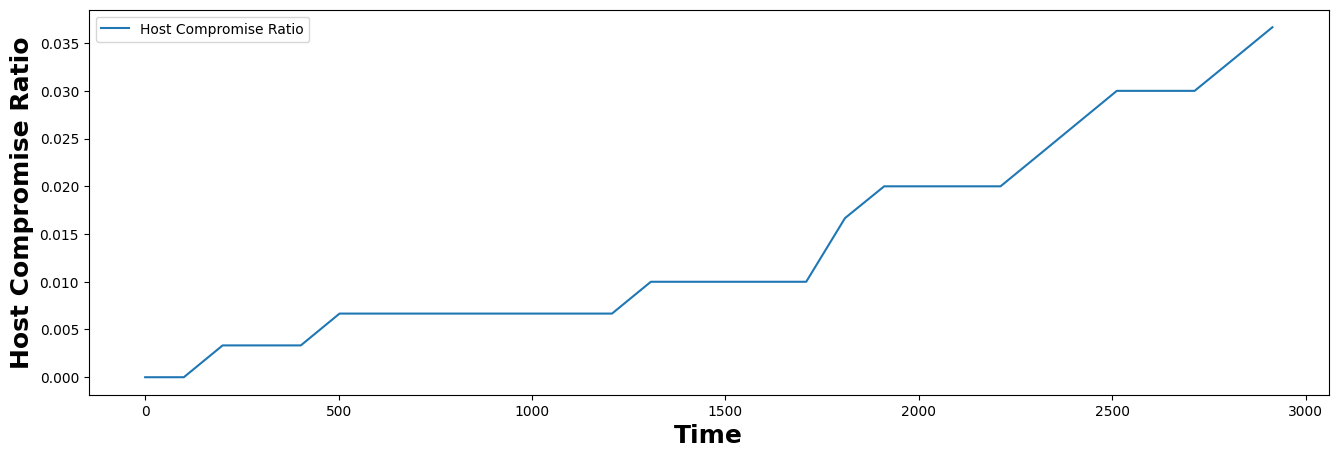

In [17]:
evaluation.visualize_host_compromise_ratio()

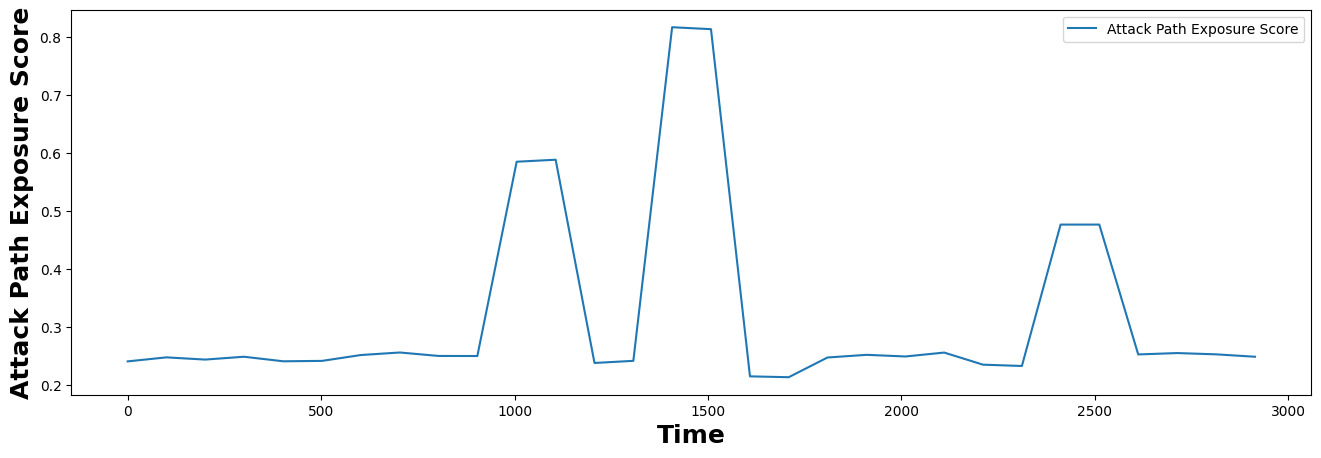

In [18]:
evaluation.visualize_attack_path_exposure_score()

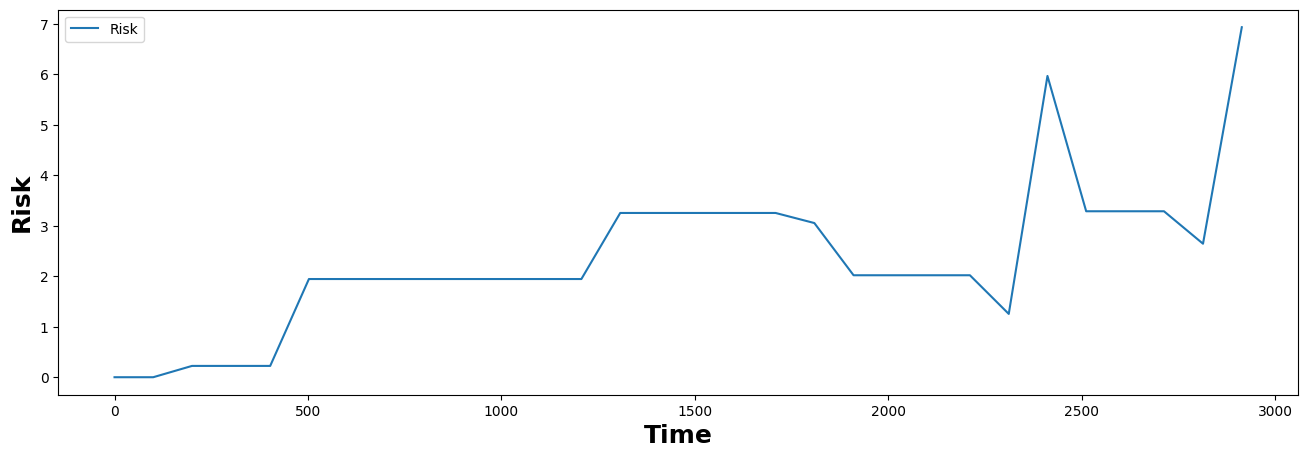

In [19]:
evaluation.visualize_risk()

In [20]:
# evaluation = execute_simulation(start_time=0, finish_time=3000, mtd_interval=200, scheme='random', total_nodes=100, new_network=True)